In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# The $F$ distribution and its properties

The $F$ distribution characterizes the distribution of the following quantity: $$F = \frac{Y_1/\nu_1}{Y_2/\nu_2}$$ where $Y_1$ and $Y_2$ are two independent variables that are distributed according to $\chi^2$ with $\nu_1$ and $\nu_2$ degrees of freedom, respectively.

The PDF is quite complicated: $$f(x|\nu_1,\nu_2) = \frac{\Gamma((\nu_1+\nu_2)/2)}{\Gamma(\nu_1/2)\Gamma(\nu_2/2)} \left(\frac{\nu_1}{\nu_2}\right)^{\nu_1/2} \frac{x^{(\nu_1-2)/2}}{(1+x\nu_1/\nu_2)^{(\nu_1+\nu_2)/2}}$$

The mean, variance, and mode are: $$\langle x \rangle = \frac{\nu_2}{\nu_2-2}, (\nu_2>2)$$ $$\mathrm{Var}(x) = \frac{\nu_2^2(2\nu_2 + 2\nu_1 - 4)}{\nu_1(\nu_2-1)^2(\nu_2-4)}, (\nu_2>4)$$ $$\mathrm{Mode} = \frac{\nu_2(\nu_1-2)}{\nu_1(\nu_2+2)}$$

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

This can be used to characterize (among other things) the distribution of the ratio:  $$F_{12} = \frac{Y_1/\nu_1}{Y_2/\nu_2} = \frac{Y_1/(n_1-1)}{Y_2/(n_2-1)} = \frac{S_1^2/\sigma_1^2}{S_2^2/\sigma_2^2}.$$

In [2]:
xmax = 5
xgrid = np.linspace(0, xmax, 100)

nu1, nu2 = 5, 10
f1pdf = stats.f.pdf(xgrid, nu1, nu1)
f2pdf = stats.f.pdf(xgrid, nu1, nu2)
f3pdf = stats.f.pdf(xgrid, nu2, nu2)

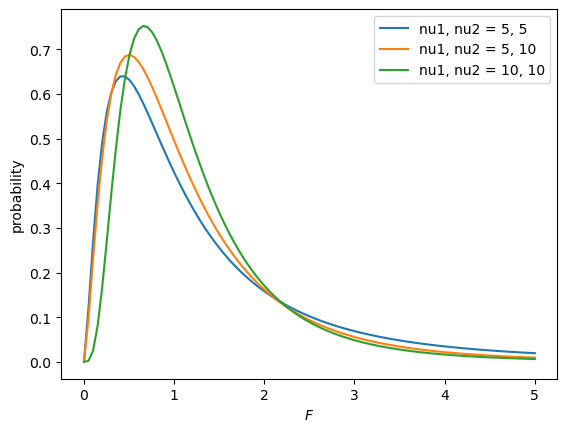

In [3]:
plt.plot(xgrid, f1pdf, label='nu1, nu2 = %d, %d' %(nu1, nu1))
plt.plot(xgrid, f2pdf, label='nu1, nu2 = %d, %d' %(nu1, nu2))
plt.plot(xgrid, f3pdf, label='nu1, nu2 = %d, %d' %(nu2, nu2))
plt.xlabel('$F$')
plt.ylabel('probability')
plt.legend()

Here is an empirical demonstration of the $F$ distribution.

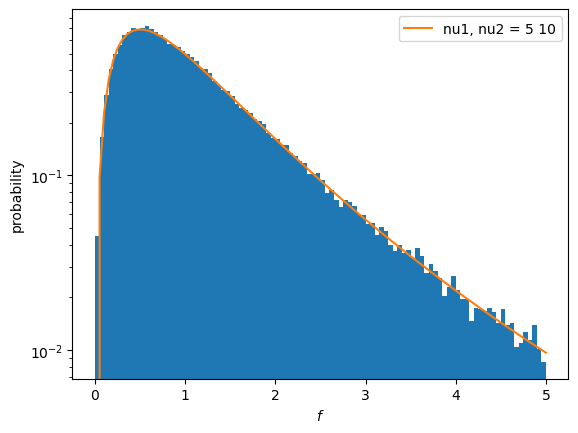

In [4]:
# create two gaussians
mu1  = 3.0   # parent population mean
sig1 = 4.0   # parent population standard deviation
mu2  = 5.0
sig2 = 2.0

# Let's draw this many random numbers each simulation.
n1  = 6
n2  = 11

# and many simulations so we can plot the distribution.
nsims = 100000

fvals = np.zeros(nsims)
for i in range(nsims):
    x1 = np.random.normal(loc=mu1, scale=sig1, size=n1)
    x2 = np.random.normal(loc=mu2, scale=sig2, size=n2)
    s1 = x1.var(ddof=1)
    s2 = x2.var(ddof=1)
    fvals[i] = (s1/(sig1**2))/(s2/(sig2**2))

# plot the histogram of the nsims realizations
xmax = 5
a,b,c = plt.hist(fvals, range=[0, xmax], bins=100, density=True)

# and overplot the theoretical F distribution with
# nu1-1, nu2-1 degrees of freedom
xgrid = np.linspace(0, xmax, 100)
fpdf = stats.f.pdf(xgrid, n1-1, n2-1)
plt.plot(xgrid, fpdf, label='nu1, nu2 = %d %d' % (n1-1, n2-1))
plt.xlabel('$f$')
plt.ylabel('probability')
plt.yscale('log')
plt.legend()

For the example discussed in class, the probability that $F \ge 3.33$ for $\nu_1 = 5$ and $\nu_2 = 10$ is:

In [5]:
f = 3.33
nu1 = 5
nu2 = 10
1-stats.f.cdf(f, nu1, nu2)

0.04983127579722135